In [1]:
from __future__ import print_function
from distutils.version import LooseVersion as Version
import sys

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.9 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == min_ver:
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(sys.version)
if pyversion >= "3.9":
    print(OK, "Python version is %s" % sys.version)
elif pyversion < "3.9":
    print(FAIL, "Python version 3.9 is required,"
                " but %s is installed." % sys.version)
else:
    print(FAIL, "Unknown Python version: %s" % sys.version)

    
print()
requirements = {'numpy': "1.21.1", 'matplotlib': "3.4.2",'sklearn': "0.24.2", 
                'pandas': "1.3.1",'xgboost': "1.3.3", 'shap': "0.39.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.9.7 | packaged by conda-forge | (default, Sep  2 2021, 17:58:46) 
[Clang 11.1.0 ]

[ OK ] numpy version 1.21.1 is installed.
[ OK ] matplotlib version 3.4.2 is installed.
[ OK ] sklearn version 0.24.2 is installed.
[ OK ] pandas version 1.3.1 is installed.
[ OK ] xgboost version 1.3.3 is installed.
[ OK ] shap version 0.39.0 is installed.


In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns
import missingno as msno # visualize missing values


# show the entire dataset
pd.set_option('display.expand_frame_repr', False)

# read in the csv file into dataframe
train_df=pd.read_csv(r'../data/used_car_train.csv',sep=' ')
test_df=pd.read_csv(r'../data/used_car_testB.csv',sep=' ')

print("The shape of training data:", "it has", train_df.shape[0], "row ,", train_df.shape[1], "columns")
print("The shape of test data:", "it has", test_df.shape[0], "row ,", test_df.shape[1], "columns")


The shape of training data: it has 150000 row , 31 columns
The shape of test data: it has 50000 row , 30 columns


In [3]:
pd.set_option('display.max_columns', None)

# Display the first and last 5 rows of train dataset
train_df.head().append(train_df.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,0.0,4576,0,0,20160327,5900,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,0.0,2826,0,0,20160312,9500,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,0.0,3302,0,0,20160328,7500,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,0.0,1877,0,0,20160401,4999,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,0.0,235,0,0,20160305,4700,45.536383,-3.200326,-1.612893,-0.067144,-1.396166,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [4]:
#Display the first and last 5 rows of test dataset
test_df.head().append(test_df.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,0.0,5019,0,0,20160308,42.142061,-3.094739,-0.721300,1.466344,1.009846,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,0.0,1505,0,0,20160310,43.907034,-3.244605,-0.766430,1.276718,-1.065338,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,-,1776,0,0,20160309,45.389665,3.372384,-0.965565,-2.447316,0.624268,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,0.0,26,0,0,20160314,42.788775,4.035052,-0.217403,1.708806,1.119165,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,0.0,738,0,0,20160306,43.670763,-3.135382,-1.134107,0.470315,0.134032,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014
49995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,-,5564,0,0,20160309,46.321013,-3.304401,0.073363,-0.622359,-0.778349,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,0.0,5220,0,0,20160323,48.086547,-3.318641,0.965881,-2.672160,0.357440,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,0.0,3795,0,0,20160316,46.145279,-3.305263,-0.015283,-0.288329,-0.687112,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,0.0,61,0,0,20160327,45.507088,-3.197006,-1.141252,-0.434930,-1.845040,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379
49999,249999,78202,20090708,32.0,8,1.0,0.0,0.0,0,3.0,0.0,4158,0,0,20160401,44.289471,4.181452,0.547068,-0.775841,1.789601,0.231449,0.103947,0.096027,0.062328,0.110180,-3.689090,2.032376,0.109157,2.202828,0.847469


In [5]:
# display the relative stats info of train dataset
train_df.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [6]:
# display the relative stats info of test dataset
test_df.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.00000,50000.000000,48496.000000,47076.000000,48032.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,224999.500000,68505.606100,2.003401e+07,47.64948,8.087140,1.793736,0.376498,0.226953,119.766960,12.598260,2581.080680,0.0,0.0,2.016033e+07,44.400023,-0.065525,0.079706,0.078381,0.022361,0.248147,0.044624,0.124693,0.058198,0.062113,0.019633,0.002759,0.004342,0.004570,-0.007209
std,14433.901067,61032.124271,5.351615e+04,49.90741,7.899648,1.764970,0.549281,0.418866,206.313348,3.912519,1889.248559,0.0,0.0,1.113395e+02,2.459920,3.636631,2.930829,2.019136,1.194215,0.045836,0.051664,0.201440,0.029171,0.035723,3.764095,3.289523,2.515912,1.287194,1.044718
min,200000.000000,1.000000,1.991000e+07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,2.014031e+07,31.122325,-4.231855,-4.032142,-5.801254,-4.233626,0.000000,0.000000,0.000000,0.000000,0.000000,-9.119719,-5.662163,-8.291868,-4.157649,-6.098192
25%,212499.750000,11315.000000,1.999100e+07,11.00000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1006.000000,0.0,0.0,2.016031e+07,43.120935,-3.193169,-0.967832,-1.456793,-0.922153,0.243436,0.000035,0.062519,0.035413,0.033880,-3.675196,-1.963928,-1.865406,-1.048722,-0.440706
50%,224999.500000,52215.000000,2.003091e+07,30.00000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2204.500000,0.0,0.0,2.016032e+07,44.601493,-3.053506,-0.384910,0.118448,-0.068187,0.257818,0.000801,0.095880,0.056804,0.058749,1.632134,-0.375537,-0.138943,-0.036352,0.136849
75%,237499.250000,118710.750000,2.007110e+07,66.00000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3842.000000,0.0,0.0,2.016033e+07,45.987018,3.978703,0.239689,1.563490,0.871565,0.265263,0.101654,0.125470,0.079387,0.087624,2.846205,1.263451,1.775632,0.945239,0.685555
max,249999.000000,196808.000000,2.015121e+07,246.00000,39.000000,7.000000,6.000000,1.000000,19211.000000,15.000000,8120.000000,0.0,0.0,2.016041e+07,51.676686,7.190759,18.865988,9.386558,4.959106,0.291176,0.153403,1.411559,0.157458,0.211304,12.177864,18.789496,13.384828,5.635374,2.649768


In [7]:
# observae the date types
print("train_df\n")
train_df.info()
print('-------------------------------------------------------')
print("test_df\n")
test_df.info()

train_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64

In [8]:
# check each column's missing value

print('train_df missing value situation:\n',train_df.isnull().sum())
print('--------------------------------')
print('test_df missing value situation:\n',test_df.isnull().sum())

train_df missing value situation:
 SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64
--------------------------------
test_df missing value situation:
 SaleID                  0
name                    0
regDate                 0
m

<AxesSubplot:title={'center':'Visualization of Counting Missing Values'}, ylabel='counts'>

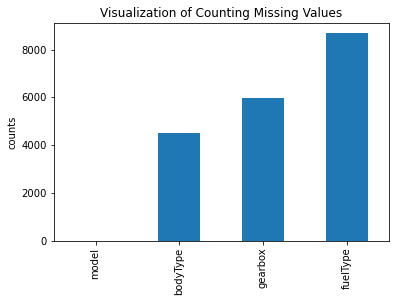

In [9]:
# missing_1 = train
missing_1 = train_df.isnull().sum()
missing_1= missing_1[missing_1 > 0]
missing_1.sort_values(inplace=True)
missing_1.plot.bar(title="Visualization of Counting Missing Values",ylabel="counts")

<AxesSubplot:title={'center':'Visualization of Counting Missing Values'}, ylabel='counts'>

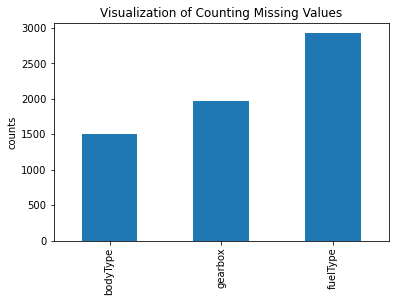

In [10]:
missing_2= test_df.isnull().sum()
missing_2= missing_2[missing_2 > 0]
missing_2.sort_values(inplace=True)
missing_2.plot.bar(title="Visualization of Counting Missing Values",ylabel="counts")

<AxesSubplot:>

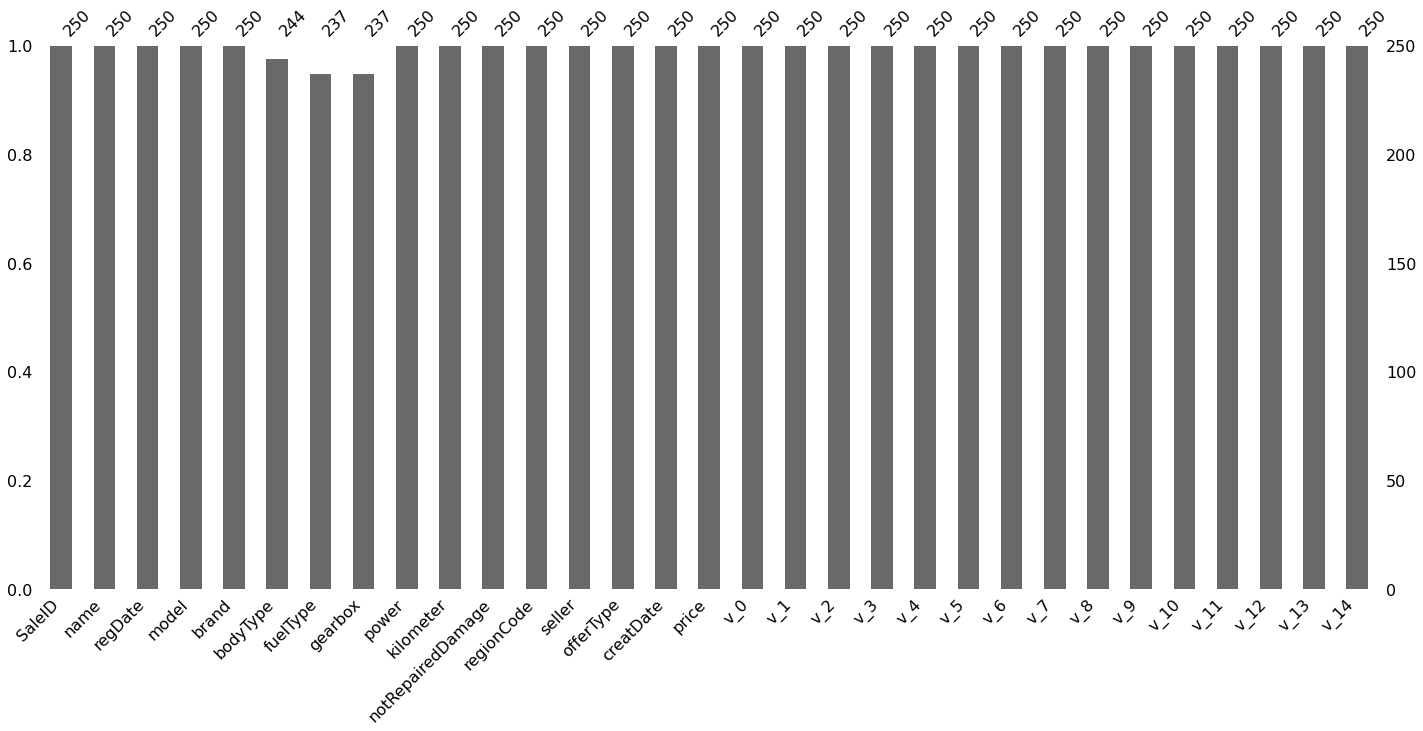

In [11]:
# Visualize the missing values in range of [0:250] the original datset
msno.bar(train_df.sample(250))

<AxesSubplot:>

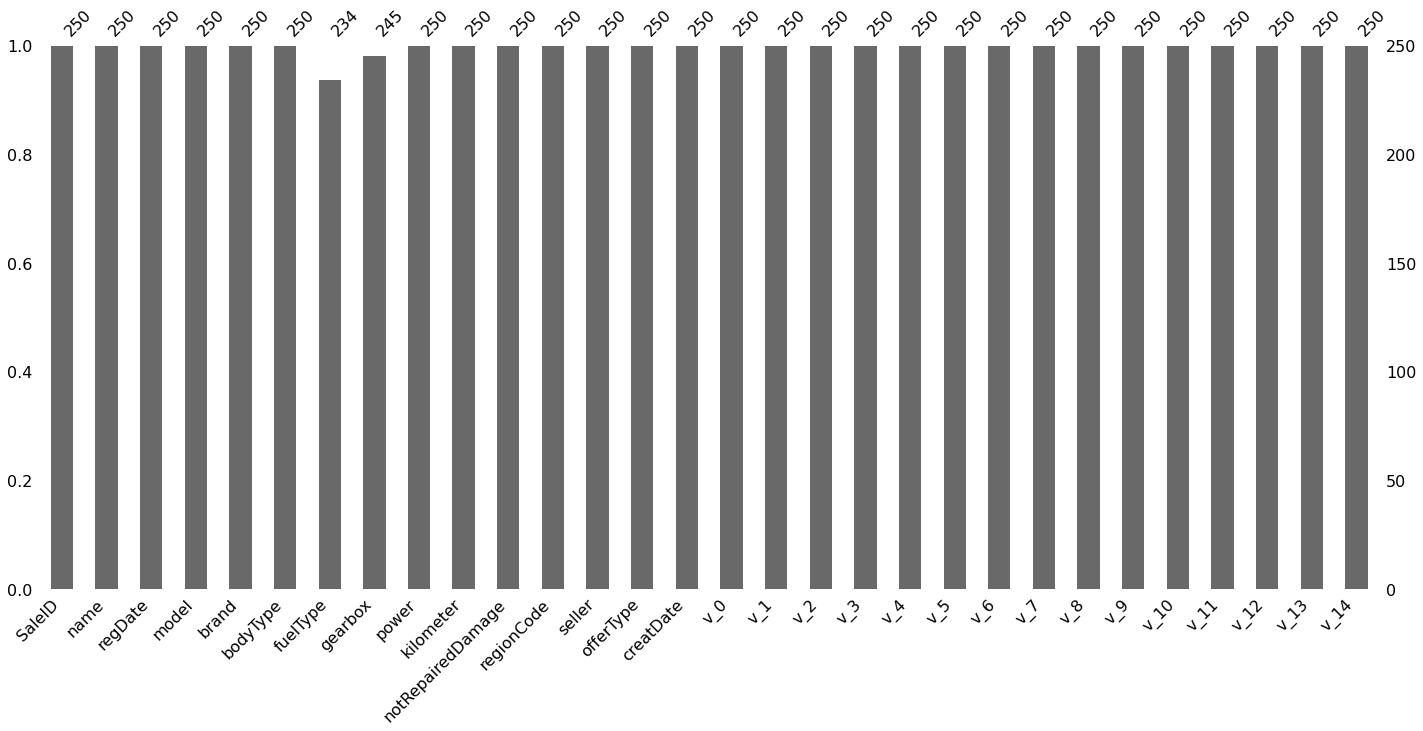

In [12]:
msno.bar(test_df.sample(250))

In [13]:
# Only notRepairedDamage is object type
train_df['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [14]:
train_df['notRepairedDamage'].replace('-', np.nan, inplace=True)
train_df['notRepairedDamage'].value_counts()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  125676 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [15]:
# deal missing value in test data
test_df['notRepairedDamage'].value_counts()

0.0    37224
-       8069
1.0     4707
Name: notRepairedDamage, dtype: int64

In [16]:
test_df['notRepairedDamage'].replace('-', np.nan, inplace=True)
test_df['notRepairedDamage'].value_counts()

0.0    37224
1.0     4707
Name: notRepairedDamage, dtype: int64

In [17]:
# Categorical features that tilted badly
print(train_df["seller"].value_counts())
print(train_df["offerType"].value_counts())
print(test_df["seller"].value_counts())
print(test_df["offerType"].value_counts())

0    149999
1         1
Name: seller, dtype: int64
0    150000
Name: offerType, dtype: int64
0    50000
Name: seller, dtype: int64
0    50000
Name: offerType, dtype: int64


In [18]:
# delete them
del train_df["seller"]
del train_df["offerType"]
del test_df["seller"]
del test_df["offerType"]

In [19]:
# separate categorical and continuous features
continuous = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical = ['bodyType', 'fuelType', 'gearbox','notRepairedDamage']

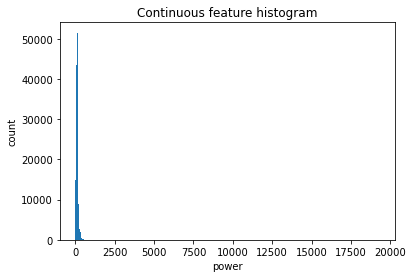

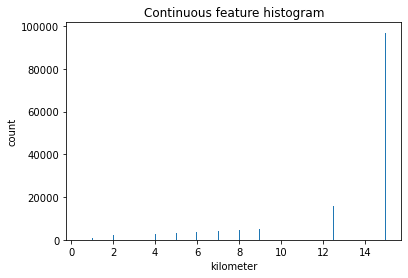

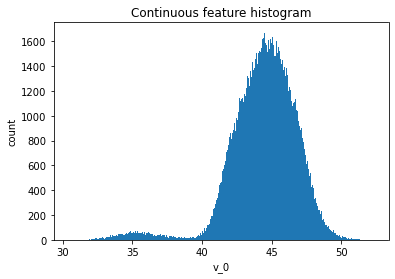

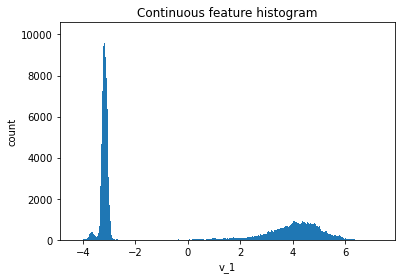

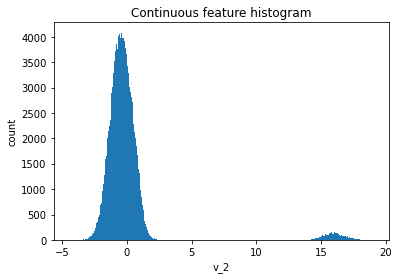

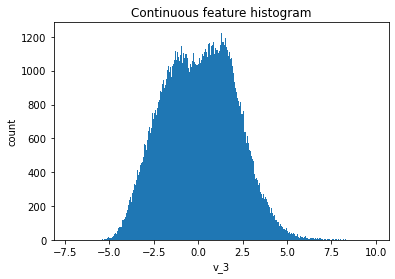

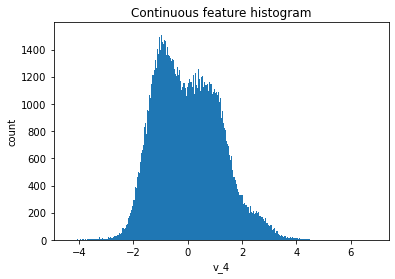

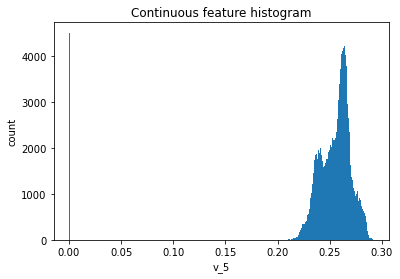

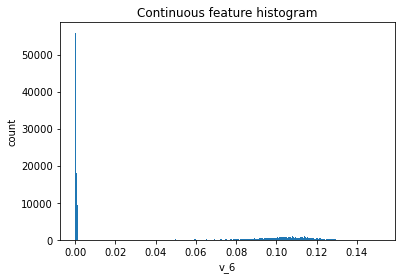

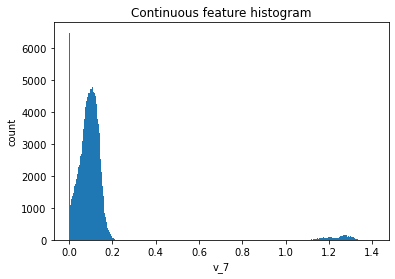

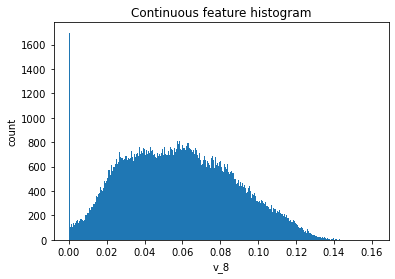

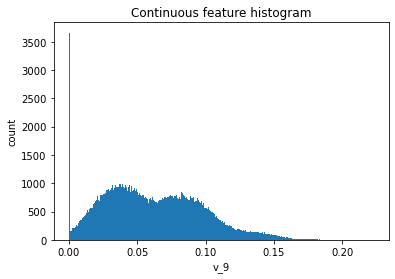

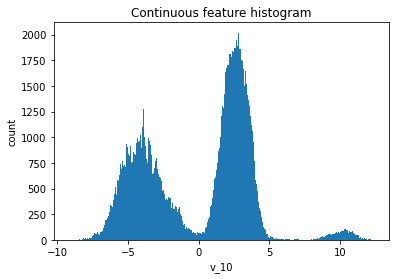

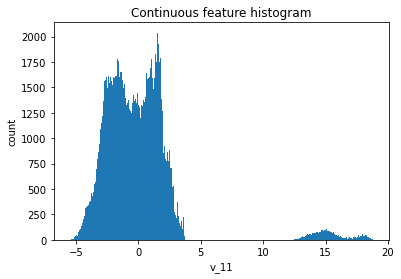

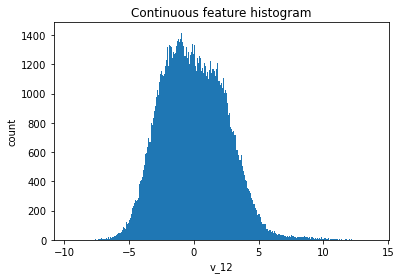

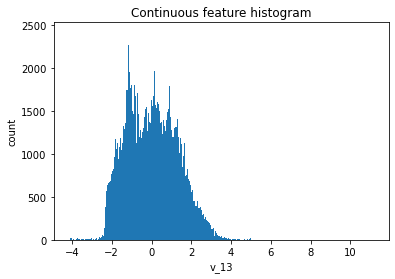

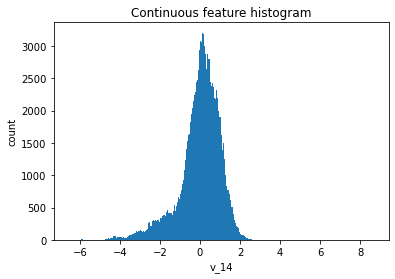

In [20]:
# bar and hist graph for cont and cate features
for cont in continuous:
    train_df[cont].plot.hist(bins = int(np.sqrt(train_df.shape[0])))
    plt.xlabel(cont)
    plt.ylabel('count')
    plt.title('Continuous feature histogram')
    plt.show()
   # plt.savefig("Graph"+str(cont)+'.png', dpi=300, format="PNG")

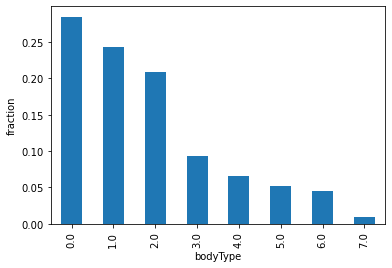

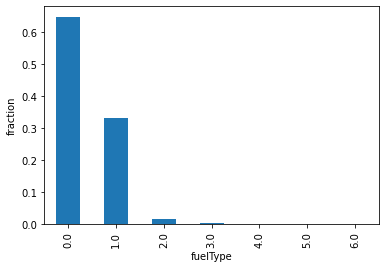

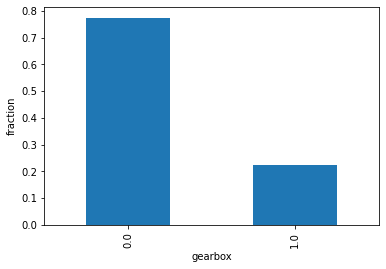

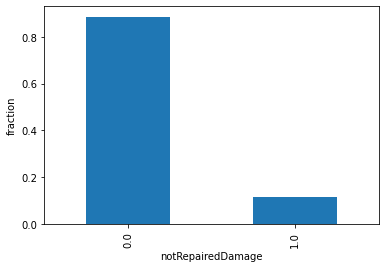

In [21]:
for cate in categorical:
    pd.value_counts(train_df[cate],normalize=True).plot.bar()
    plt.ylabel('fraction')
    plt.xlabel(cate)
    plt.show()
    #plt.savefig(fname=cate, dpi=400,format='png')

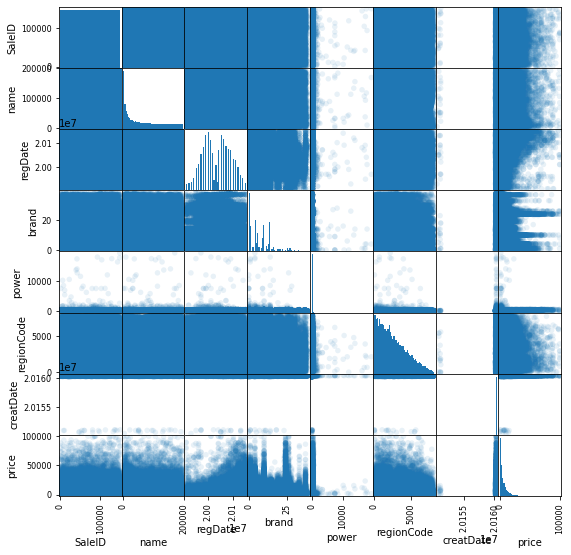

In [22]:
pd.plotting.scatter_matrix(train_df.select_dtypes(int), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()
#plt.savefig('scatter_matrix.png', dpi=300,format="PNG")

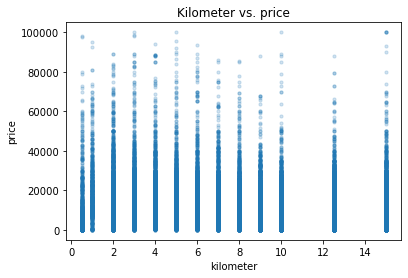

In [23]:
# ------- continuous vs. continuous -----------------
train_df.plot.scatter('kilometer','price',s=10,alpha=0.2) # alpha=0.1(透明度),s=10（点大小）
plt.title("Kilometer vs. price")
plt.show()
#plt.savefig('scatter_plot.png', dpi=300,format="PNG")

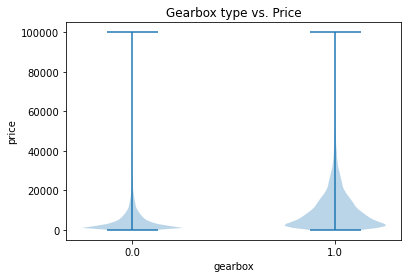

In [24]:
# ------- continuous vs. categorical -----------------
dataset = [train_df[train_df['gearbox']==0.0]['price'].values,
           train_df[train_df['gearbox']==1.0]['price'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['0.0','1.0'])
plt.title('Gearbox type vs. Price')
plt.xlabel('gearbox')
plt.ylabel('price')
plt.show()

notRepairedDamage    0.0    1.0
gearbox                        
0.0                83176  11303
1.0                26095   2542
notRepairedDamage       0.0       1.0
gearbox                              
0.0                0.880365  0.119635
1.0                0.911234  0.088766


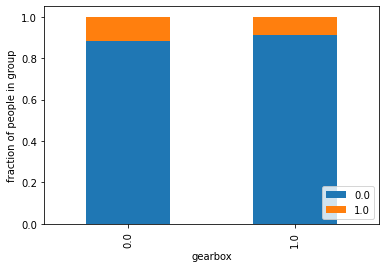

In [25]:
# -------------categorical vs categorical-------------
count_matrix = train_df.groupby(['gearbox', 'notRepairedDamage']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

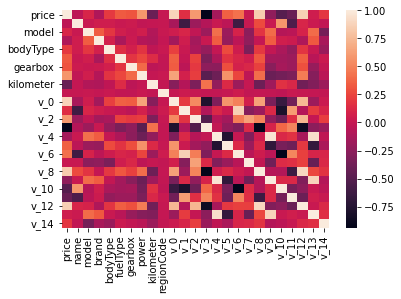

In [26]:
all_feature=['price','name',  'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
        'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6','v_7', 'v_8', 'v_9',
        'v_10', 'v_11', 'v_12', 'v_13', 'v_14']
corr=train_df[all_feature].corr(method='spearman')
corr=pd.DataFrame(corr)  
sns.heatmap(corr,fmt='0.2f') 
plt.show()
#plt.savefig('heatmap.png', dpi=400,format="PNG")

In [27]:
# --------------- overlook the missing value---------------------
train_df.isnull().sum()[train_df.isnull().sum() > 0]

model                    1
bodyType              4506
fuelType              8680
gearbox               5981
notRepairedDamage    24324
dtype: int64

In [28]:
# --------------categorical features use mode to fillna------------------
train_df.fuelType.fillna(train_df.fuelType.mode()[0], inplace=True)
train_df.gearbox.fillna(train_df.gearbox.mode()[0], inplace=True)
train_df.bodyType.fillna(train_df.bodyType.mode()[0], inplace=True)
train_df.model.fillna(train_df.model.mode()[0], inplace=True)
train_df.notRepairedDamage.fillna(train_df.notRepairedDamage.mode()[0], inplace=True)

In [29]:
# ------------------ GroupShuffle ---------------------
from sklearn.model_selection import GroupShuffleSplit

y = train_df['price']
X = train_df.loc[:, train_df.columns != 'price']
groups = np.array(train_df['name'])

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for other_idx, test_idx in gss.split(X, y, groups):
    print("other:", other_idx, "test:", test_idx)
    print('number of train dataset + val dataset',len(other_idx))
    print('number of test dataset',len(test_idx))
    X_other, X_test = X.iloc[other_idx,:], X.iloc[test_idx]
    y_other, y_test = y.iloc[other_idx], y.iloc[test_idx]

gss2 = GroupShuffleSplit(n_splits=1, test_size=0.5, random_state=42)

for train_idx, val_idx in gss2.split(X_other, y_other, X_other['name']):
    print("Validation:", val_idx, "TRAIN:", train_idx)
    print('number of val_data',len(val_idx))
    print('number of train_data',len(train_idx))
    X_val, X_train = X_other.iloc[val_idx,:], X_other.iloc[train_idx]
    y_val, y_train = y_other.iloc[val_idx], y_other.iloc[train_idx]

other: [     0      1      3 ... 149997 149998 149999] test: [     2      5     29 ... 149982 149987 149992]
number of train dataset + val dataset 120925
number of test dataset 29075
Validation: [     0      4      5 ... 120921 120922 120923] TRAIN: [     1      2      3 ... 120917 120920 120924]
number of val_data 60442
number of train_data 60483


In [30]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

onehot_ftrs = categorical
std_ftrs = continuous

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print('---------------X_train--------------')
print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)
print('---------------X_test--------------')
print(X_test.shape)
print(X_test_prep.shape)
print(X_test_prep)
print('---------------X_val--------------')
print(X_val.shape)
print(X_val_prep.shape)
print(X_val_prep)

---------------X_train--------------
(60483, 28)
(60483, 36)
[[ 0.          0.          1.         ... -0.39679751 -1.32816565
   0.23420701]
 [ 1.          0.          0.         ... -0.18666975 -1.88435211
  -0.46880438]
 [ 0.          1.          0.         ...  0.3829478   2.2134339
   1.86302389]
 ...
 [ 0.          0.          0.         ...  1.62047277 -0.48197512
   0.56541563]
 [ 0.          0.          0.         ...  0.24702341 -1.00308301
  -0.29785498]
 [ 0.          0.          0.         ...  0.02543619 -1.14217609
  -0.33676313]]
---------------X_test--------------
(29075, 28)
(29075, 36)
[[ 0.          1.          0.         ...  0.63505426 -0.63651695
  -0.22735264]
 [ 1.          0.          0.         ...  0.98976106 -0.21241804
   0.19639792]
 [ 1.          0.          0.         ... -0.32211991  0.69302876
  -0.1904885 ]
 ...
 [ 1.          0.          0.         ... -1.04237621  0.23433867
   0.45746353]
 [ 1.          0.          0.         ...  0.09306442  1.37